In [ ]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
(X_train, _),(_,_) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


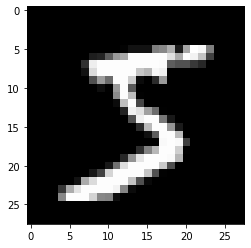

In [ ]:
plt.imshow(X_train[0], cmap="gray")

In [ ]:
# Normalise the data [-1,1]
X_train = (X_train.astype('float32')- 127.5)/127.5
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


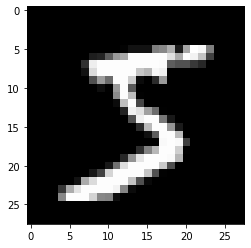

In [ ]:
plt.imshow(X_train[0], cmap="gray")

In [ ]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_train.shape[0]/ BATCH_SIZE)
HALF_BATCH = 128
NOISE_DIM = 100 # UPsample into 784 Dimensional vector
adam = Adam(learning_rate=2e-4, beta_1=0.5)

In [ ]:
#Generator
# Input noise of 100 dimension and outputs a vector 784 dimension

generator = Sequential()
generator.add(Dense(256, input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 784)               8

In [ ]:
# building a discriminator
discriminator = Sequential()
discriminator.add(Dense(512, input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy", optimizer=adam)

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Creating a GAN
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API
model = Model(gan_input, gan_output)
model.compile(loss="binary_crossentropy", optimizer=adam)

In [ ]:
X_train = X_train.reshape(-1,784)
print(X_train.shape)

(60000, 784)


In [ ]:
def save_imgs(epochs, samples=100):
  noise = np.random.normal(0,1,size=(samples, NOISE_DIM))
  generated_imgs = generator.predict(noise) 
  generator_imgs= generated_imgs.reshape(samples,28,28)

  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generator_imgs[i], interpolation='nearest', cmap='gray')
    plt.axis("off")
  plt.tight_layout()
  plt.savefig("images/gan_output_epoch_{}.png".format(epoch+1))
  plt.show()

Epoch- 1   Discriminator Loss - 0.6564360419527079  Generator Loss- 0.925420436848942
Epoch- 2   Discriminator Loss - 0.6403573366821321  Generator Loss- 1.0038969009859948
Epoch- 3   Discriminator Loss - 0.6448116988962532  Generator Loss- 1.0482115735355606
Epoch- 4   Discriminator Loss - 0.6150730461136907  Generator Loss- 1.1478495078209119
Epoch- 5   Discriminator Loss - 0.6026819387180173  Generator Loss- 1.222253223769685


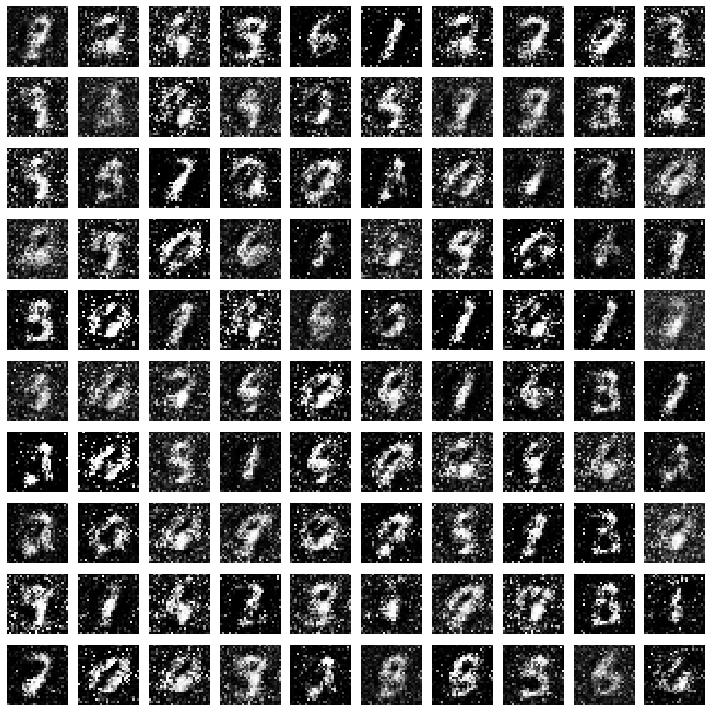

Epoch- 6   Discriminator Loss - 0.5704666286961645  Generator Loss- 1.2828618053697114
Epoch- 7   Discriminator Loss - 0.5744766689773299  Generator Loss- 1.2792203293906317
Epoch- 8   Discriminator Loss - 0.5990896518541198  Generator Loss- 1.205240869623983
Epoch- 9   Discriminator Loss - 0.6149811436477889  Generator Loss- 1.123205627131666
Epoch- 10   Discriminator Loss - 0.6341578990985186  Generator Loss- 1.0644218758640127


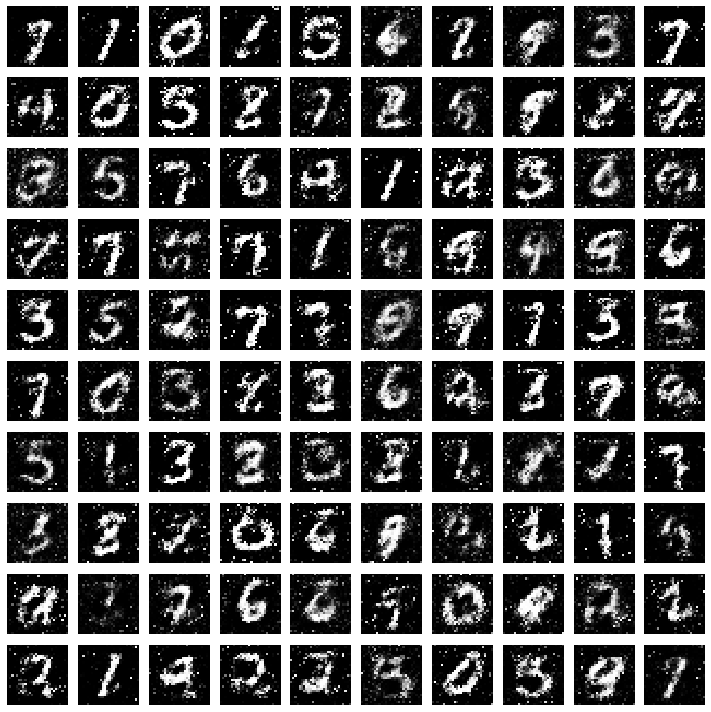

Epoch- 11   Discriminator Loss - 0.6453926746661847  Generator Loss- 1.0137261358591227
Epoch- 12   Discriminator Loss - 0.6474130352338155  Generator Loss- 1.0100218798869696
Epoch- 13   Discriminator Loss - 0.6428820312532604  Generator Loss- 1.0215343058618724
Epoch- 14   Discriminator Loss - 0.6435706881631134  Generator Loss- 1.0176290767824547
Epoch- 15   Discriminator Loss - 0.6473829174398357  Generator Loss- 1.0140486374879494


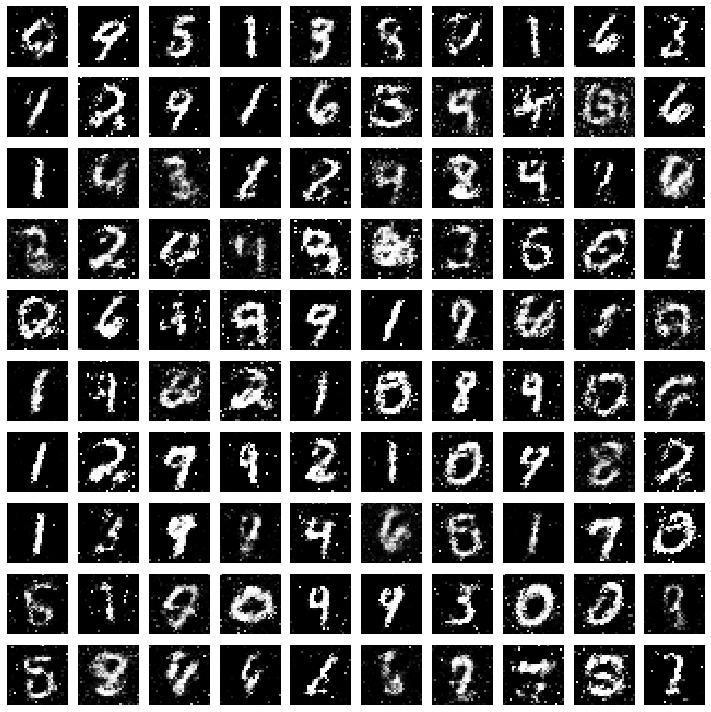

Epoch- 16   Discriminator Loss - 0.6460522618303951  Generator Loss- 1.0165074225674329
Epoch- 17   Discriminator Loss - 0.6511511232098962  Generator Loss- 0.9993344494420239
Epoch- 18   Discriminator Loss - 0.6474744753959851  Generator Loss- 1.0068498809113462
Epoch- 19   Discriminator Loss - 0.6497761995619179  Generator Loss- 1.0088720915154514
Epoch- 20   Discriminator Loss - 0.6511376544705822  Generator Loss- 1.0036125458203828


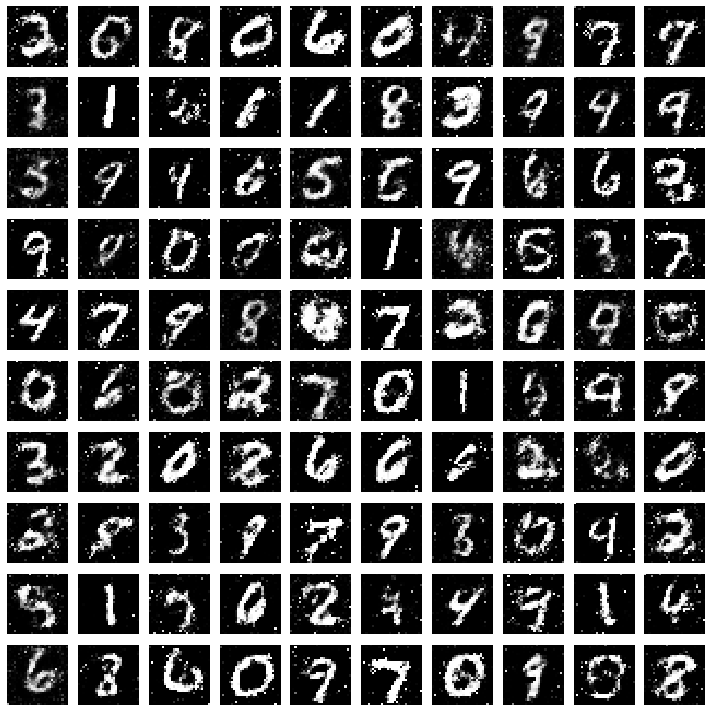

Epoch- 21   Discriminator Loss - 0.6525934990654644  Generator Loss- 1.0034561307511778
Epoch- 22   Discriminator Loss - 0.6530713432619715  Generator Loss- 0.9963892795081831
Epoch- 23   Discriminator Loss - 0.6563075373315403  Generator Loss- 0.9937934276894627
Epoch- 24   Discriminator Loss - 0.6562935628442683  Generator Loss- 0.9903959591164548
Epoch- 25   Discriminator Loss - 0.6584730192891552  Generator Loss- 0.9945858255920247


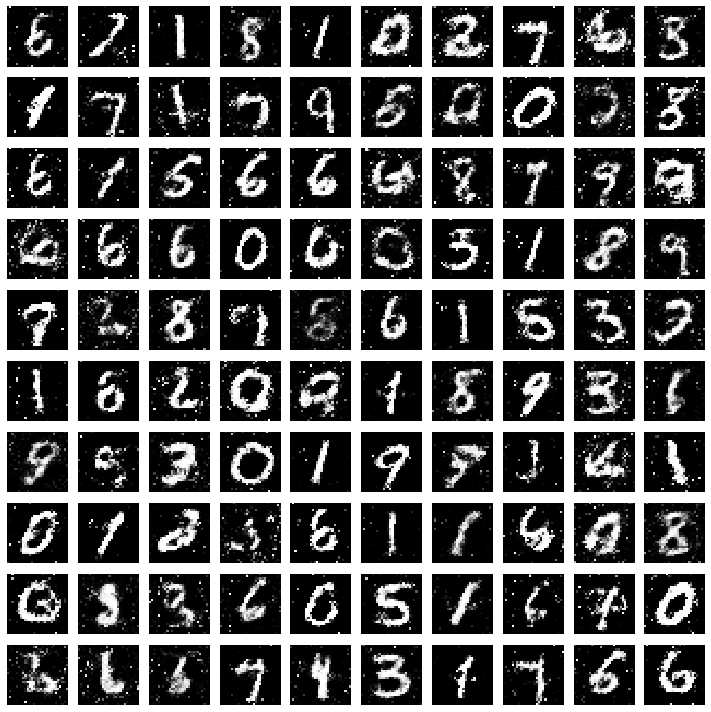

Epoch- 26   Discriminator Loss - 0.6575352059215562  Generator Loss- 0.9953430547164037
Epoch- 27   Discriminator Loss - 0.657819213775488  Generator Loss- 0.9837225064253196
Epoch- 28   Discriminator Loss - 0.6584042356564448  Generator Loss- 0.9873316746491653
Epoch- 29   Discriminator Loss - 0.659133124173197  Generator Loss- 0.9885648950042888
Epoch- 30   Discriminator Loss - 0.6583328645708214  Generator Loss- 0.9934660254890083


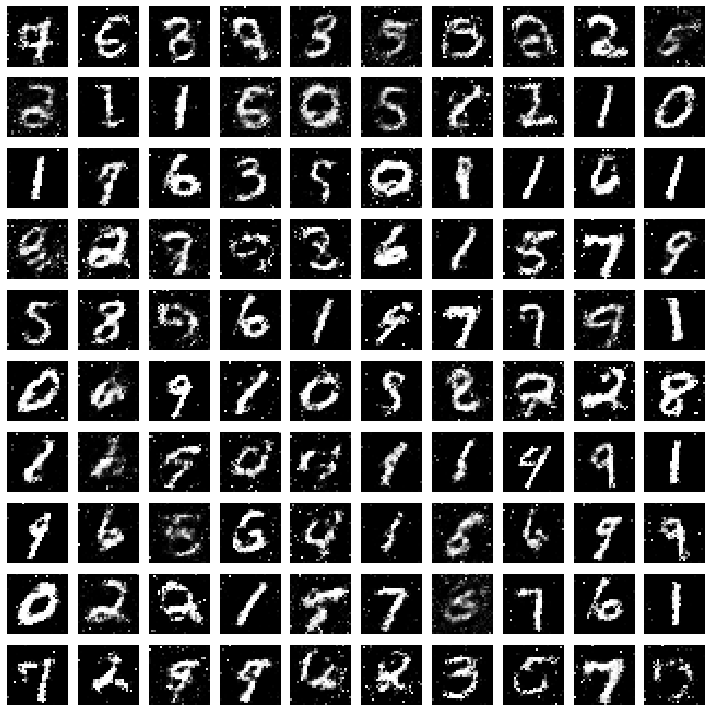

Epoch- 31   Discriminator Loss - 0.6588890556341562  Generator Loss- 0.9855510279154166
Epoch- 32   Discriminator Loss - 0.6607910744909548  Generator Loss- 0.9857723124516315
Epoch- 33   Discriminator Loss - 0.6607453563274481  Generator Loss- 0.9818532515285362
Epoch- 34   Discriminator Loss - 0.6623562918259547  Generator Loss- 0.9893015376013569
Epoch- 35   Discriminator Loss - 0.6628614312563187  Generator Loss- 0.9884911678795122


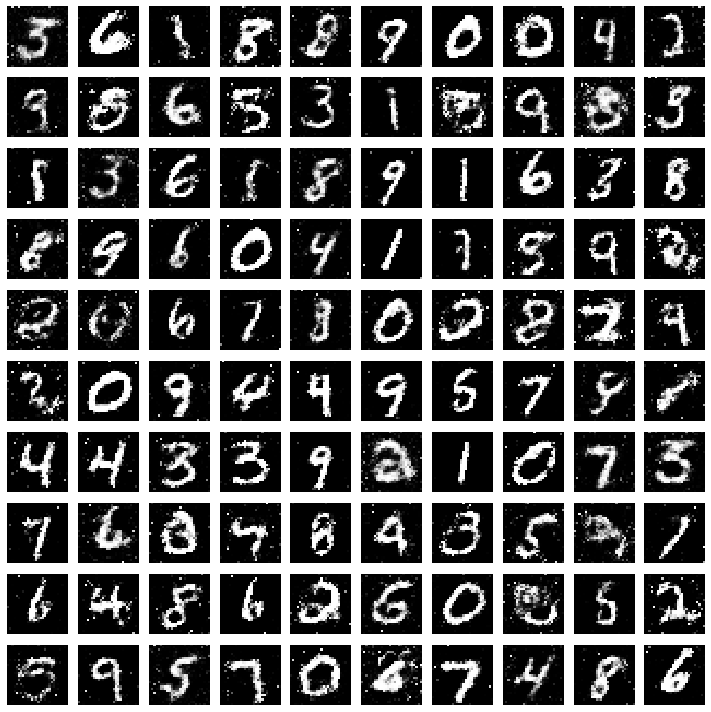

Epoch- 36   Discriminator Loss - 0.6645246078061242  Generator Loss- 0.9808701544235914
Epoch- 37   Discriminator Loss - 0.6658125105831358  Generator Loss- 0.9763874768191932
Epoch- 38   Discriminator Loss - 0.6643039715341014  Generator Loss- 0.9809111906931951
Epoch- 39   Discriminator Loss - 0.6640510066197469  Generator Loss- 0.9761818497099428
Epoch- 40   Discriminator Loss - 0.6649775629879063  Generator Loss- 0.9782088865072299


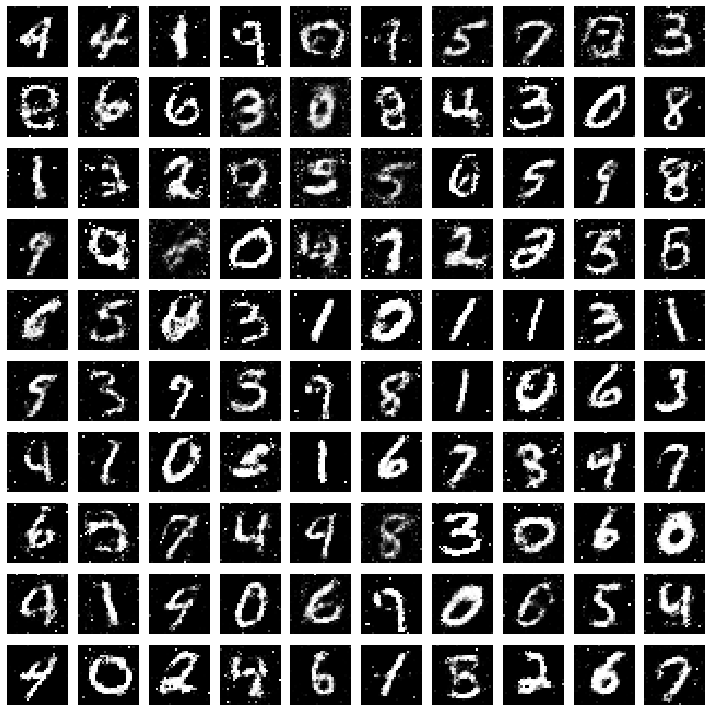

Epoch- 41   Discriminator Loss - 0.6657425705184284  Generator Loss- 0.9746333638317565
Epoch- 42   Discriminator Loss - 0.667126141806953  Generator Loss- 0.9745190574063195
Epoch- 43   Discriminator Loss - 0.6663257037727242  Generator Loss- 0.9765963123904334
Epoch- 44   Discriminator Loss - 0.6666858766832923  Generator Loss- 0.9705149740235418
Epoch- 45   Discriminator Loss - 0.6674454014780175  Generator Loss- 0.9705290172854041


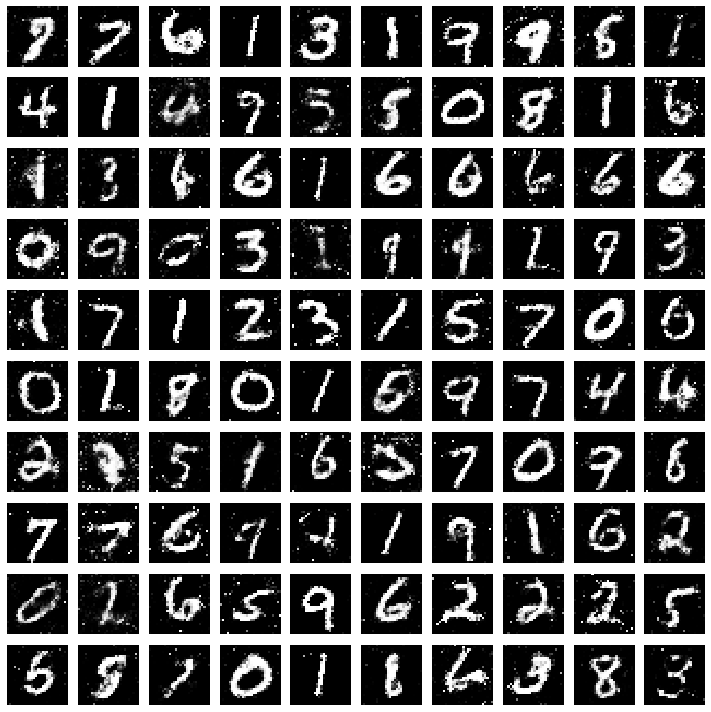

Epoch- 46   Discriminator Loss - 0.6676681963806479  Generator Loss- 0.9731487654722654
Epoch- 47   Discriminator Loss - 0.668364208478194  Generator Loss- 0.9730445059955629
Epoch- 48   Discriminator Loss - 0.667903850475947  Generator Loss- 0.9730189987736889
Epoch- 49   Discriminator Loss - 0.6678780639528209  Generator Loss- 0.9749432924466256
Epoch- 50   Discriminator Loss - 0.6676186416138951  Generator Loss- 0.9767882716961396


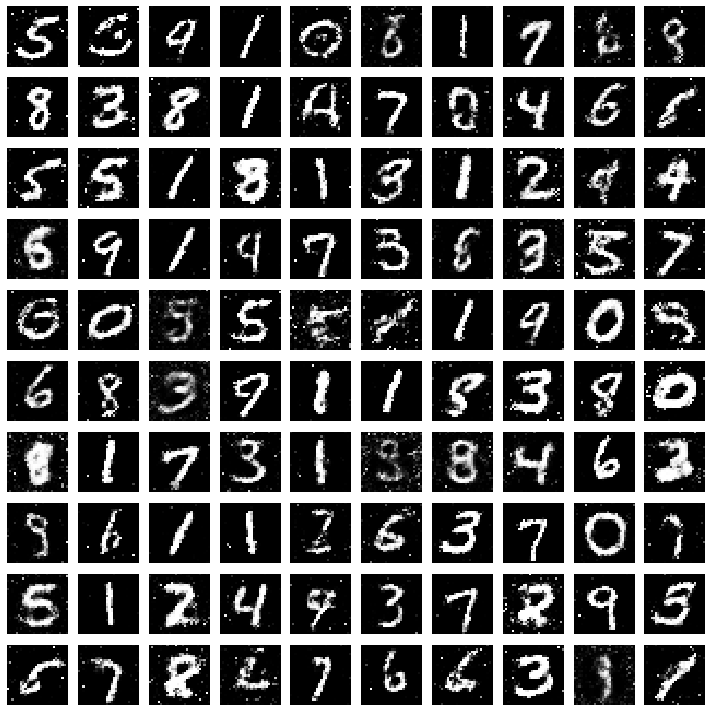

In [ ]:
# Training Loop
for epoch in range(TOTAL_EPOCHS):
  epoch_d_loss=0.
  epoch_g_loss=0.

  #Mini batch SGD
  for step in range(NO_OF_BATCHES):
    # Step-1 Discriminator
    # 50% Real Data+ 50% Fake Data


    #Real data
    idx = np.random.randint(0,X_train.shape[0], HALF_BATCH)
    real_imgs = X_train[idx]

    #Fake Data
    noise = np.random.normal(0,1,size=(HALF_BATCH, NOISE_DIM))
    fake_imgs = generator.predict(noise) #FORWARD


    # LABELS
    real_y = np.ones((HALF_BATCH,1))*0.9    #one sided label smoothing for discriminator
    fake_y = np.zeros((HALF_BATCH,1))

    #Train our discriminator
    d_loss_real = discriminator.train_on_batch(real_imgs, real_y)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_y)
    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake 

    epoch_d_loss += d_loss 


    #Step2 - Train the generator considering frozen discriminator
    noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    ground_truth_y = np.ones((BATCH_SIZE,1))
    g_loss=model.train_on_batch(noise, ground_truth_y)
    epoch_g_loss += g_loss
  print("Epoch- {}   Discriminator Loss - {}  Generator Loss- {}".format(epoch+1, epoch_d_loss/NO_OF_BATCHES, epoch_g_loss/NO_OF_BATCHES))

  if (epoch+1)%5 ==0:
    generator.save("model/gan_generator_{0}.h5".format(epoch+1))
    save_imgs(epoch)

In [ ]:
!mkdir images

In [ ]:
!ls -l

total 12
drwxr-xr-x 2 root root 4096 Aug  6 17:30 images
drwxr-xr-x 2 root root 4096 Aug  6 17:25 model
drwxr-xr-x 1 root root 4096 Aug  3 20:21 sample_data


In [ ]:
! cd images
!ls images

In [ ]:
!ls -l

total 12
drwxr-xr-x 2 root root 4096 Aug  6 17:30 images
drwxr-xr-x 2 root root 4096 Aug  6 17:25 model
drwxr-xr-x 1 root root 4096 Aug  3 20:21 sample_data
